# Introduction to Regression with Neural Networks in TensorFLow

Therer are many definitions for regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables even shorter...predicting a number.

In [2]:
#Import TensorFLow
import tensorflow as tf
print(tf.__version__)

2.8.0


##Creating a data to view and fit

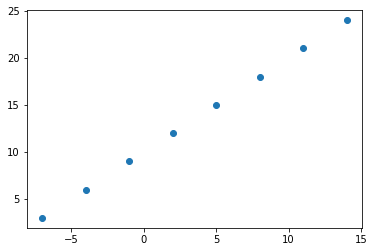

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y)

##Input and output shapes

In [4]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [5]:
#Turn our numpy into tensorflow
X = tf.constant(X)
y = tf.constant(y)

In [6]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["Bedroom","Bathroom","Garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedroom', b'Bathroom', b'Garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

##Steps in modelling with TensorFLow

1. **Creating a model** - define a=the input and ouput layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function(in other words, function which tells our model how wrong it is) and the optimizer(tell our model how to improve the patterns its learning) and evaluation mstrics(what we use to interpret the performance of our model)
3. Fitting a model - letting the model try to find patterns between X and y(feature and labels).

In [7]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(5)])
model.add(tf.keras.layers.Dense(5))

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent
              metrics=["mae"])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 598ms/step - loss: 13.7624 - mae: 13.7624
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 13.6991 - mae: 13.6991
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 13.6364 - mae: 13.6364
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 13.5745 - mae: 13.5745
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 13.5131 - mae: 13.5131


##Steps in modelling with TensorFlow

1. Construct or import a pretrained model relevent to your problem.
2. Compile the model(prepare it to be used with data).

a) Loss : how wrong your model's predictiona are compared to the labels.

b) Optimizer : how your model should update its internal patterns to better   its prediction.

c) Metrics : human interpretable values for how well your  model is doing.

3. Fit the model to the training data so it can discover patterns.

a) Epochs : how many times the model will go  through all of the  training examples.

4. Evaluate the model  on the test data(how reliable are our model's predictions?)

In [8]:
model.predict([17.0])

array([[ 11.7218485,   7.337239 ,   5.926073 , -11.846189 ,  -9.086757 ]],
      dtype=float32)

###Improving our model

In [9]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(5)])
model.add(tf.keras.layers.Dense(5))

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent
              metrics=["mae"])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 329ms/step - loss: 13.7624 - mae: 13.7624
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6991 - mae: 13.6991
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.6364 - mae: 13.6364
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 13.5745 - mae: 13.5745
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 13.5131 - mae: 13.5131
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 13.4523 - mae: 13.4523
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3918 - mae: 13.3918
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3316 - mae: 13.3316
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 13.2717 - mae: 13.2717
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 13.2118 - mae: 13.2118
Epoch 11/100
1/1 [==============================] - 0s 

In [10]:
model.predict([17.0])

array([[31.989277, 29.977783, 31.77119 ,  9.581663, 22.707006]],
      dtype=float32)

In [11]:
#Create a new model(witha an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation="relu"), tf.keras.layers.Dense(5)])
#2. Compile the model
model.compile(loss="mae", #mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent
              metrics=["mae"])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 330ms/step - loss: 13.5880 - mae: 13.5880
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 13.4859 - mae: 13.4859
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3843 - mae: 13.3843
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 13.2829 - mae: 13.2829
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 13.1813 - mae: 13.1813
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 13.0792 - mae: 13.0792
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9765 - mae: 12.9765
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8729 - mae: 12.8729
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 12.7682 - mae: 12.7682
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 12.6637 - mae: 12.6637
Epoch 11/100
1/1 [==============================] - 

In [12]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
model.predict([17.0])

array([[32.524   , 32.346153, 32.57597 , 32.447872, 32.456104]],
      dtype=float32)

In [14]:
#Change Optimizer function
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation=None), tf.keras.layers.Dense(5)])
#2. Compile the model
model.compile(loss="mae", #mean absolute error
              optimizer=tf.keras.optimizers.Adam(), #stochastic gradient descent
              metrics=["mae"])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 381ms/step - loss: 13.7634 - mae: 13.7634
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6994 - mae: 13.6994
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.6354 - mae: 13.6354
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.5713 - mae: 13.5713
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.5072 - mae: 13.5072
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4430 - mae: 13.4430
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3786 - mae: 13.3786
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 13.3141 - mae: 13.3141
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 13.2494 - mae: 13.2494
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 13.1846 - mae: 13.1846
Epoch 11/100
1/1 [==============================] - 0

In [15]:
model.predict([17.0])

array([[31.78613 , 31.682867, 30.84707 , 31.502401, 30.325031]],
      dtype=float32)

In [16]:
#Change Optimizer function with learning rate
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation=None), tf.keras.layers.Dense(5)])
#2. Compile the model
model.compile(loss="mae", #mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.01), #stochastic gradient descent
              metrics=["mae"])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 367ms/step - loss: 13.6722 - mae: 13.6722
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.0072 - mae: 13.0072
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.3393 - mae: 12.3393
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.6554 - mae: 11.6554
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9464 - mae: 10.9464
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2032 - mae: 10.2032
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4162 - mae: 9.4162
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.5756 - mae: 8.5756
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.8165 - mae: 7.8165
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.2542 - mae: 7.2542
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 7.25

In [17]:
model.predict([17.0])

array([[27.32999 , 26.937603, 26.774431, 27.191385, 26.846632]],
      dtype=float32)

##Common ways to improve a deep model:

1. Adding layers.
2. Increase the number of hidden layers.
3. Chnage the activation function.
4. Chnage the optimization function.
5. Change the learning rate.
6. Fittin gon more data.
7. Fiitng for longer.

#Evaluating a TensorFlow model

In [18]:
#Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
#Make labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

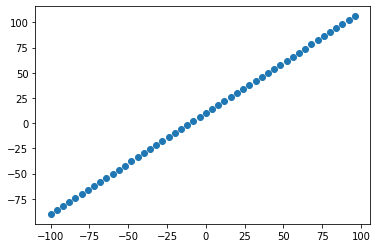

In [20]:
plt.scatter(X,y)

In [21]:
#Check the kength of data
len(X)

50

In [22]:
#Split the data into train and test sets
X_train = X[:40] #First 40 are training samples(80% of data)
y_train = y[:40] 

X_test = X[40:] #Last 10 are testing samples(20% of data)
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

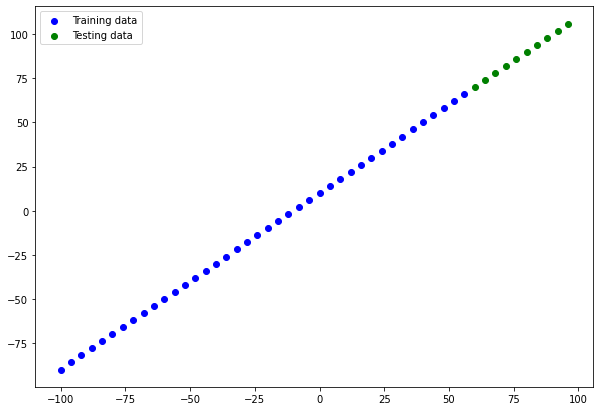

In [23]:
#Visualize the data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [35]:
#Let's create a model which builds automatically by defining the input_shape
tf.random.set_seed(42)
#Create a model
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])
#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent
              metrics=["mae"])

#Fit the model
model.fit(X_train,y_train,epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


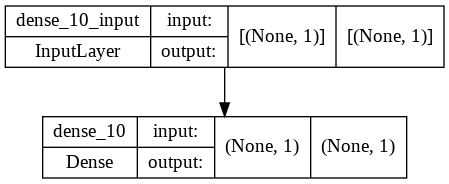

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [27]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [28]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [29]:
#Create a plotting functin
def plot_prediction(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();


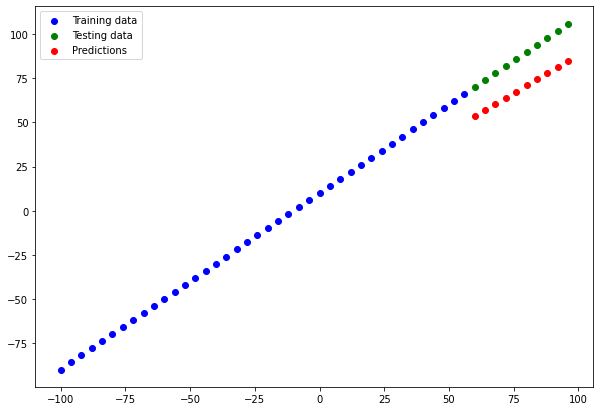

In [30]:
plot_prediction(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred)

In [36]:
#set random seed
tf.random.set_seed(42)
#Create a model
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])
#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, #mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent
              metrics=["mae"])

#Fit the model
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 8ms/step -

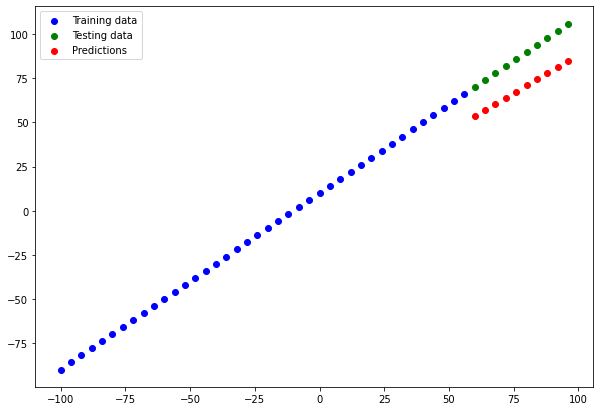

In [38]:
y_pred_1 = model_1.predict(X_test)
plot_prediction(predictions=y_pred_1)

In [39]:
#Save our model using save model format
model_1.save("saveModel_Format")

INFO:tensorflow:Assets written to: saveModel_Format/assets


In [40]:
#Save our model using HDF5 format
model_1.save("HDF5_Format.h5")

In [41]:
#Load in the SaveModel Format model
loaded_saveModel_Format = tf.keras.models.load_model("/content/saveModel_Format")
loaded_saveModel_Format.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
